<b>Task content</b> Find an (unpopular) set for classification. Prepare an xgboost model and additional 2
models you will choice. Select hyperparameters using Grid Search.Perform cross-validation.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, make_scorer
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline

### The dataset
The dataset "Depression" is available on kaggle: https://www.kaggle.com/datasets/diegobabativa/depression
The dataset is involved into the analysis of depression and contains data about the life conditions of people who live in rurales zones. <br>

In [2]:
df = pd.read_csv('b_depressed.csv')
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Survey_id,926.0,747.0,1190.0,1065.0,806.0,483.0,849.0,1386.0,930.0,390.0
Ville_id,91.0,57.0,115.0,97.0,42.0,25.0,130.0,72.0,195.0,33.0
sex,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
Age,28.0,23.0,22.0,27.0,59.0,35.0,34.0,21.0,32.0,29.0
Married,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
Number_children,4.0,3.0,3.0,2.0,4.0,6.0,1.0,2.0,7.0,4.0
education_level,10.0,8.0,9.0,10.0,10.0,10.0,9.0,10.0,9.0,10.0
total_members,5.0,5.0,5.0,4.0,6.0,8.0,3.0,4.0,9.0,5.0
gained_asset,28912201.0,28912201.0,28912201.0,52667108.0,82606287.0,35937466.0,41303144.0,12013633.0,11087568.0,28912201.0
durable_asset,22861940.0,22861940.0,22861940.0,19698904.0,17352654.0,736707.0,21925041.0,20323505.0,25224208.0,22861940.0


### Variables<br>
The dataset contains 23 columns:<br>
1. Survey_id - id of survey 1-1429, numerical data,
1. Ville_id - id of a place, categorical data,
1. sex - gender - categorical data,
2. Age - (min 17 - max 91)numerical data,
2. Married - whether the respondent was married or not - categorical data,
3. Number_children- number of children (min 0 - max 11) - numerical data,
4. education_level - level of education - categorical data,
5. total_members (in the family) - (min 1 - max 12)- numerical data,
6. gained_asset (min 325112 - max 99127548) - numerical data,
7. durable_asset (min 162556 - max 99615601) - numerical data,
8. save_asset (min 17296 - max 99926758) - numerical data,
9. living_expenses (min 262919 - max 99295282)- numerical data,
10. other_expenses(min 172966 - max 99823799)- numerical data,
11. incoming_salary - categorical data,
12. incoming_own_farm - categorical data,
13. incoming_business - categorical data,
14. incoming_no_business - categorical data,
15. incoming_agricultural (min 325112 - max 99789095)- numerical data,
16. farm_expenses (min 271505 - max 99651194)- numerical data,
17. labor_primary - categorical data,
18. lasting_investment (min 74292 - max 99446667) - numerical data,
19. no_lasting_investmen (min 126312 - max 99651194)- numerical data,
20. depressed: Zero - no depressed, One - depressed- categorical data, target

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survey_id,1429.0,7.150000e+02,4.126611e+02,1.0,358.0,715.0,1072.0,1429.0
Ville_id,1429.0,7.628621e+01,6.644401e+01,1.0,24.0,57.0,105.0,292.0
sex,1429.0,9.181246e-01,2.742708e-01,0.0,1.0,1.0,1.0,1.0
Age,1429.0,3.477747e+01,1.398622e+01,17.0,25.0,30.0,42.0,91.0
Married,1429.0,7.725682e-01,4.193204e-01,0.0,1.0,1.0,1.0,1.0
Number_children,1429.0,2.883135e+00,1.874472e+00,0.0,2.0,3.0,4.0,11.0
education_level,1429.0,8.687194e+00,2.923532e+00,1.0,8.0,9.0,10.0,19.0
total_members,1429.0,4.969209e+00,1.786317e+00,1.0,4.0,5.0,6.0,12.0
gained_asset,1429.0,3.363448e+07,2.003854e+07,325112.0,23269824.0,28912201.0,37172832.0,99127548.0
durable_asset,1429.0,2.717296e+07,1.815672e+07,162556.0,19298521.0,22861940.0,26569498.0,99615601.0


Almost each column contains 1429 entires. Except for 21 "no_lasting_investmen". This column has only 1409 entries.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

Using method `is.null()` and `sum()` we can confirm the above. The column "no_lasting_investmen" has 20 missing values.

In [5]:
df.isnull().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

I decided to fill in the missing observations with the mean value for the column.

In [6]:
df.fillna(value=df['no_lasting_investmen'].mean(), inplace=True)

### How many people in the dataset are depressed?
<br> The last column "depressed" will be my target. Zero means no depressed, One - depressed. Let's check how many people in the dataset are depressed.

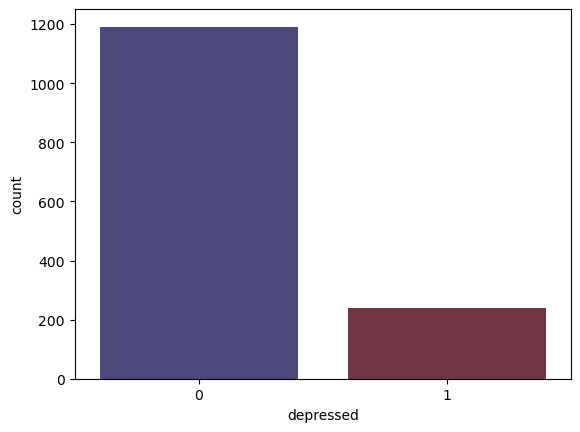

In [7]:
ax = sns.countplot(x='depressed', data=df, palette="icefire")
plt.show()

In [8]:
is_depressed = df['depressed'].value_counts()
is_depressed 

0    1191
1     238
Name: depressed, dtype: int64


Most people in the dataset are not depressed - 1191 out of 1429, only 238 are depressed.

### Does depression have a gender?
The third column in the dataset contains the information about the gender. Now I am going to check if depression is more frequent by the gender.

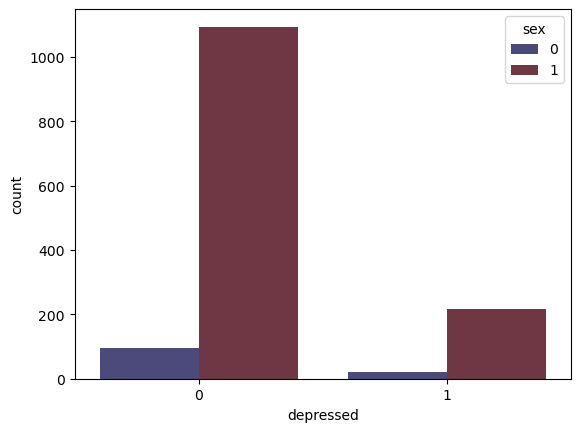

In [9]:
ax = sns.countplot(x='depressed', hue='sex', data=df, palette="icefire")
plt.show()

The above chart shows us that dataset mainly contains data for gender "1". From the contingency table we can read that in both group most observastions are for gender marks as "1". We don't know what gender it is. To check if the variables "sex" and "depressed" are dependent I will perform chi2 test of independence of variables in a contingency table. First let's make a contigency table.

In [10]:
contingency_table = pd.crosstab(df['sex'], df['depressed'])
contingency_table = contingency_table.reset_index()
contingency_table

depressed,sex,0,1
0,0,97,20
1,1,1094,218


Now we can test if the variables are dependent with the chi2 test.

In [11]:
observations = [[97, 20], [1094, 218]]

stat, p, dof, expected = stats.chi2_contingency(observations)
  
alpha = 0.05

if p <= alpha:
    print('Variables are dependent')
else:
    print('Variables are independent')
print('\n',stat, p, dof, expected)

Variables are independent

 1.2488004202108765e-05 0.9971804118565121 1 [[  97.51364591   19.48635409]
 [1093.48635409  218.51364591]]


The result of the chi2 test of independence of variables in a contingency table confirm that the varibles "sex" and "depressed" are not dependent. 
### What is the age of the people surveyed?

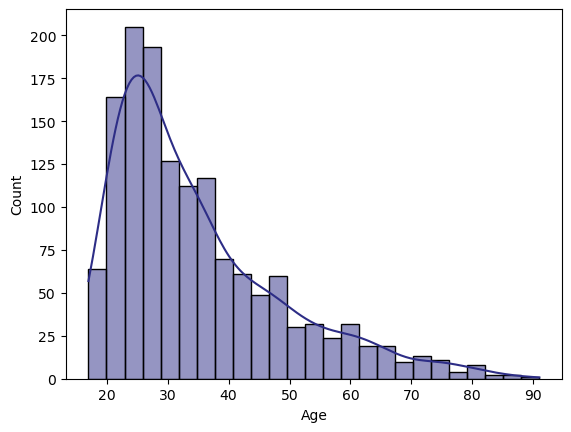

In [12]:
plot = sns.histplot(x='Age', data=df, color="#2d2d86",kde=True)
plt.show()

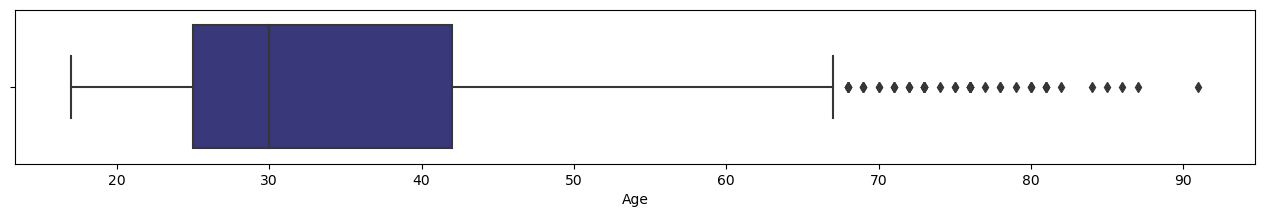

In [13]:
plt.figure(figsize=(16, 2))
plot2 = sns.boxplot(x='Age', data=df, color="#2d2d86")

The above histogram and boxplot show us that the most people in the data set are 25-42. The median for the Age column is 30. There are many outlires above 66 years old.

### How big are the survey respondents' families of and how many children do they have?
The column "Number_children" contains information about how many children the surveyed person has. 

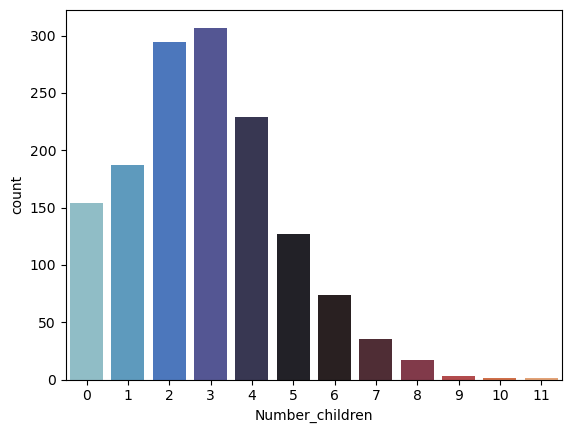

In [14]:
ax = sns.countplot(x='Number_children', data=df, palette="icefire")
plt.show()

In [15]:
number_of_children = df['Number_children'].value_counts()
number_of_children

3     307
2     294
4     229
1     187
0     154
5     127
6      74
7      35
8      17
9       3
10      1
11      1
Name: Number_children, dtype: int64

From the above barplot and table we can infer that the most common people surveyed have three children (307 cases). Then two (294 cases) and four (229 cases) children. The least common people surveyed have 10 and 11 childeren with one case each.

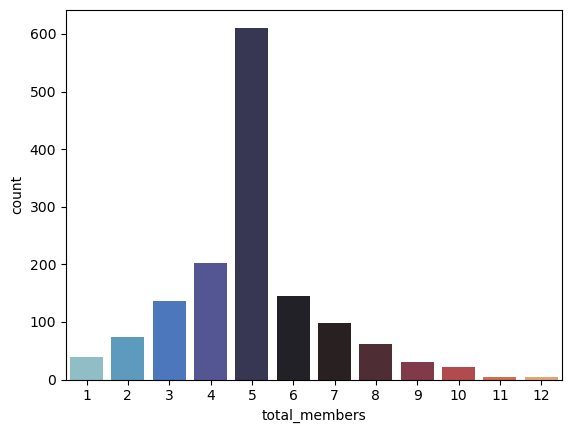

In [16]:
ax = sns.countplot(x='total_members', data=df, palette="icefire")
plt.show()

In [17]:
number_of_children = df['total_members'].value_counts()
number_of_children

5     611
4     203
6     145
3     136
7      98
2      74
8      61
1      40
9      30
10     22
12      5
11      4
Name: total_members, dtype: int64

Most often households consist of 5 family members (611 observations). Then 4 family members (203 observations) and 6 family members (145 observations). The rarest families were the most numerous - 11 family members - 4 observations and 12 family members 12 observations.
### The families living expenses
Let's look at the families living expanses. Do they have impact on whether a person is depressed?

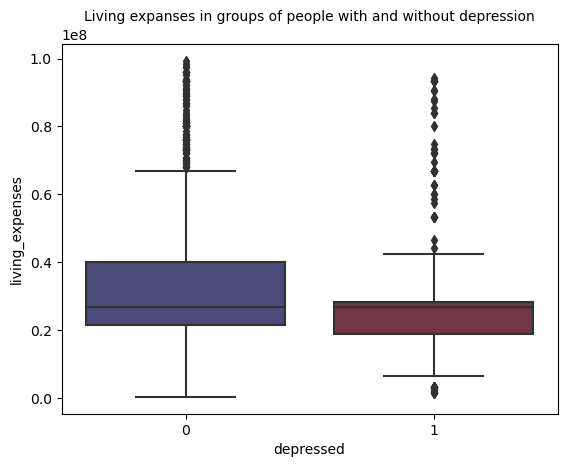

In [18]:
sns.boxplot(x='depressed', y='living_expenses', data=df, palette='icefire')
plt.title('Living expanses in groups of people with and without depression', size=10)
plt.show()

The median in both distribiutions look eqal, so probably there is there no correlation here. Let's check it with the ANOVA test.

In [19]:
model = ols('depressed ~ living_expenses', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
living_expenses,0.157893,1.0,1.136782,0.286514
Residual,198.203198,1427.0,NaN,NaN


In [20]:
#extract p-value from the model
p_val = model.pvalues[1]

In [21]:
alpha = 0.05
p_value = p_val
if p_value <= alpha:
    print('Living expenses have a significant impact on whether a person is depressed')
else:
    print('Living expenses have not a significant impact on whether a person is depressed')

Living expenses have not a significant impact on whether a person is depressed


The Anova test result did not confirm the differences in the groups, we can assume that whether a person is depressed or not does not depend on what they living expenses are.

### Trying to predict whether a person is depressed or not using the XGBoost model
Now I am going to predict if a person is depressed or not with the XGBoost Classifier model.

In [22]:
#define the target and the features
target = 'depressed'
X = df.drop([target, 'Survey_id'],axis=1)#features
y = df[target] #target

In [23]:
#model
clf_xgboost = XGBClassifier()

In [24]:
#use SelectFromModel to select features for my model
featureSelection = SelectFromModel(clf_xgboost)
featureSelection.fit(X, y)

SelectFromModel(estimator=XGBClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        gamma=None, gpu_id=None,
                                        grow_policy=None, importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=None, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=None,
                                        max_leaves=None, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        n_estimators=100, n_jobs=None,
                                        num_parallel_tree=None, predictor=None,
                                        random_state=None, ...))

In [25]:
#selected features names
X.columns[featureSelection.get_support()]

Index(['save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'labor_primary', 'no_lasting_investmen'],
      dtype='object')

In [26]:
#create a list of selected features
selected_columns = X.columns[featureSelection.get_support()]

In [27]:
#split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X[selected_columns], y, test_size=0.33, random_state=42)

Now I am going to choose hyperparameters for the model using the GridSerach. I will be searching for `max_depth`, `n_estimators` and also `scale_pos_weight` beacuse of imbalanced classes.

In [28]:
#create ranges of parameters for GridSearchCV
parameters = {'max_depth' : [1,2,3,4,5],'n_estimators': [10,20,30,50,100],'scale_pos_weight': [1,5,10]} 

In [29]:
#create grid_search with criteria
grid_search = GridSearchCV(
    estimator=clf_xgboost,
    param_grid=parameters,
    scoring = 'f1_macro',
    n_jobs = 10,
    cv = 10,
    verbose=True)

In [30]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 50, 100],
                         'scale_pos_weight': [1, 5, 10]},
             scoring='f1_macro', verbose=True)

In [31]:
best_params_xgb = grid_search.best_params_

In [32]:
#check the selected best parameters
best_params_xgb

{'max_depth': 4, 'n_estimators': 100, 'scale_pos_weight': 10}

In [33]:
#create the XGboost model using the best parameters
clf_xgboost = XGBClassifier(objective= 'binary:logistic', **best_params_xgb, random_state=3)

In [34]:
clf_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=3, ...)

In [35]:
#predict
y_pred_xgboost=clf_xgboost.predict(X_test)

In [36]:
#check the classification report for XGBoost model
print(classification_report(y_test, y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.82      0.57      0.67       391
           1       0.16      0.38      0.22        81

    accuracy                           0.54       472
   macro avg       0.49      0.48      0.45       472
weighted avg       0.70      0.54      0.60       472



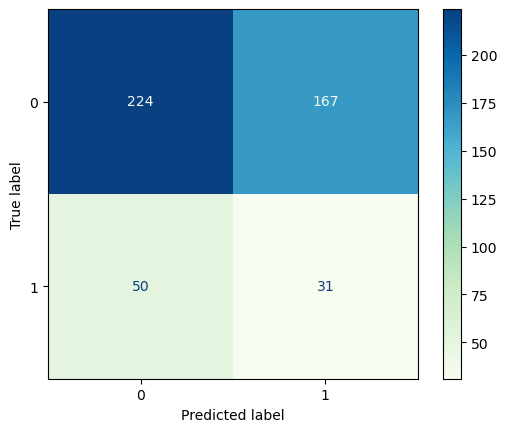

In [37]:
#plot a confusion matrix for the XGBoost model
cm_xgb = confusion_matrix(y_test, y_pred_xgboost)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot(cmap='GnBu') 
plt.show()

In [38]:
#print cross validation for XGboost Classifier and print the mean result - the expected performance of the model.
print(cross_val_score(clf_xgboost, X_train, y_train, cv=10,scoring = 'f1_macro'))
print(np.mean(cross_val_score(clf_xgboost, X_train, y_train, cv=10,scoring = 'f1_macro')))

[0.47934919 0.45915493 0.53550804 0.46572553 0.53823954 0.46572553
 0.45264914 0.46115288 0.38596491 0.50365726]
0.47471269594745535


### Trying to predict the same using the Random Forest model
I am going o predict the same using Random Forest Classifier.

In [39]:
#create the model
clf_rfc=RandomForestClassifier()

In [40]:
#use SelectFromModel to select features for my model
featureSelection = SelectFromModel(clf_rfc)
featureSelection.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier())

In [41]:
#selected features names
X.columns[featureSelection.get_support()]

Index(['Ville_id', 'Age', 'Number_children', 'education_level',
       'durable_asset', 'living_expenses', 'other_expenses', 'farm_expenses',
       'lasting_investment', 'no_lasting_investmen'],
      dtype='object')

In [42]:
#create list of selected features
selectedFeatures_clf_rfc = X.columns[featureSelection.get_support()]
#split data into train and test data
X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(X[selectedFeatures_clf_rfc], y, test_size=0.33, random_state=42)

In [43]:
#create ranges of parameters for GridSearchCV
param_grid_rfc = { 
    'n_estimators': [10,20,30,50,100],
    'max_depth' : [1,2,3,4,5]}

In [44]:
#create grid_search with criteria
CV_rfc = GridSearchCV(estimator=clf_rfc, param_grid=param_grid_rfc, cv= 5, scoring='f1_macro')
CV_rfc.fit(X_train_rfc, y_train_rfc)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 50, 100]},
             scoring='f1_macro')

In [45]:
best_params_rfc = CV_rfc.best_params_

In [46]:
clf_rfc=RandomForestClassifier(random_state=42, **best_params_rfc, class_weight='balanced')

In [47]:
clf_rfc.fit(X_train_rfc, y_train_rfc)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=30,
                       random_state=42)

In [48]:
y_pred_rfc=clf_rfc.predict(X_test_rfc)

In [49]:
# print the classification report for the Random Forest Classifier model
print(classification_report(y_test_rfc, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       391
           1       0.14      0.12      0.13        81

    accuracy                           0.72       472
   macro avg       0.48      0.48      0.48       472
weighted avg       0.70      0.72      0.71       472



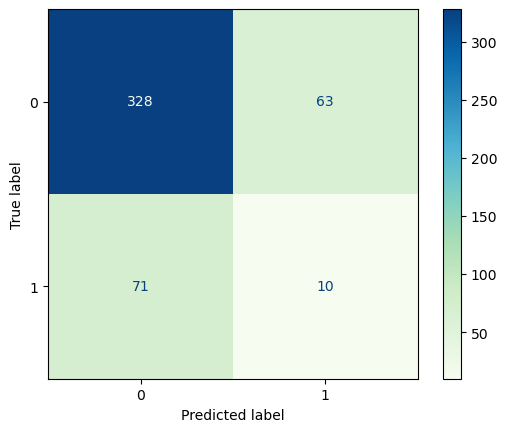

In [50]:
#plot a confusion matrix for the RandomForest Classifier model
cm_rcf = confusion_matrix(y_test_rfc, y_pred_rfc)
disp_rcf = ConfusionMatrixDisplay(confusion_matrix=cm_rcf)
disp_rcf.plot(cmap='GnBu') 
plt.show()

In [51]:
#print cross validation for RandomForest Classifier and print the mean result - the expected performance of the model.
print(cross_val_score(clf_rfc, X_train_rfc, y_train_rfc, cv=10,scoring='f1_macro'))
print(np.mean(cross_val_score(clf_rfc, X_train_rfc, y_train_rfc, cv=10,scoring='f1_macro')))

[0.51913444 0.5654321  0.52592593 0.53289613 0.61499564 0.45166067
 0.49825784 0.47389241 0.45063183 0.65161166]
0.5284438638552269


### SVM

In [52]:
# use standard scaler to create a new data frame with scaled data
scaler = StandardScaler()
svm =SVC()
#X_scaled = scaler.fit_transform(df.drop(target,axis=1).copy())

In [53]:
#split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X[selected_columns], y, test_size=0.33, random_state=42)

In [54]:
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000]}

# Create the scoring metric
scorer = make_scorer(f1_score, average='macro')

# Create the grid search object
grid_search = GridSearchCV(SVC(), param_grid, scoring=scorer, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000]},
             scoring=make_scorer(f1_score, average=macro))

In [55]:
best_params_svm = grid_search.best_params_

In [56]:
best_params_svm

{'C': 10000}

In [57]:
svm = SVC(random_state=42, **best_params_svm, kernel='rbf',class_weight='balanced')

In [58]:
y_fitted_svm = svm.fit(X_train,y_train)

In [59]:
y_pred_svm=svm.predict(X_test)

In [60]:
# print the classification report for the Random Forest Classifier model
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.48      0.61       391
           1       0.17      0.53      0.26        81

    accuracy                           0.49       472
   macro avg       0.50      0.51      0.44       472
weighted avg       0.72      0.49      0.55       472



In [61]:
#print cross validation for SVM and print the mean result - the expected performance of the model.
print(cross_val_score(svm, X_train, y_train, cv=10,scoring='f1_macro'))
print(np.mean(cross_val_score(svm, X_train, y_train, cv=10,scoring='f1_macro')))

[0.40049487 0.44481358 0.55408096 0.40796964 0.45841674 0.46125373
 0.45651055 0.39638319 0.29880952 0.48943882]
0.4368171609065964


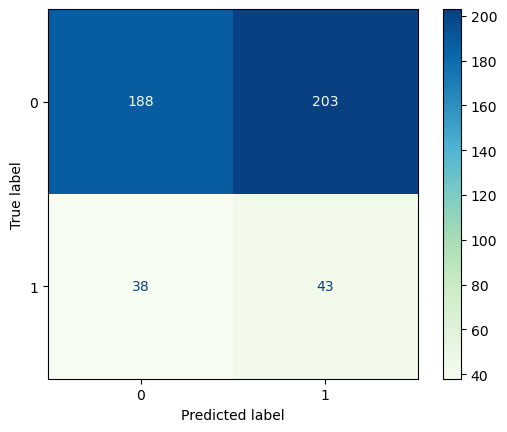

In [62]:
#plot a confusion matrix for the SVM model
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap='GnBu') 
plt.show()

### Trying to predict the same using the KNN model

In [63]:
#create a model
knn = KNeighborsClassifier()

In [64]:
#select the best hyperparameters using GridSearchCV
k_range = list(range(1, 30))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1_macro', return_train_score=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro')

In [65]:
best_params_knn = grid.best_params_

In [66]:
knn = KNeighborsClassifier(**best_params_knn)

In [67]:
#I use the same features as I used for the XGboost model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [68]:
y_pred_knn = knn.predict(X_test)#predict

In [69]:
# print the classification report for the KNN classifier model
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       391
           1       0.17      0.06      0.09        81

    accuracy                           0.79       472
   macro avg       0.50      0.50      0.49       472
weighted avg       0.72      0.79      0.74       472



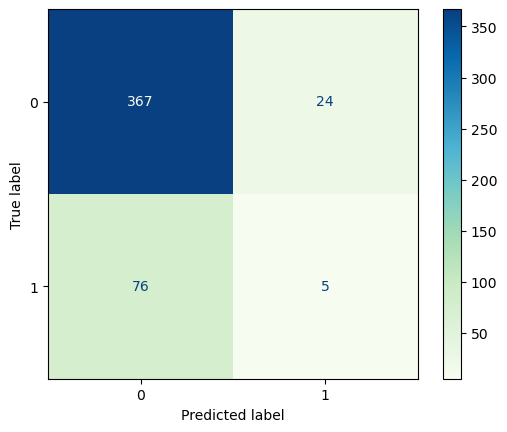

In [70]:
#plot a confusion matrix for the KNN Classifier model
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap='GnBu') 
plt.show()

In [71]:
#print cross validation for KNN Classifier and print the mean result - the expected performance of the model.
print(cross_val_score(knn, X_train, y_train, cv=10, scoring='f1_macro'))
print(np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring='f1_macro')))

[0.4922784  0.46617238 0.65474931 0.45166067 0.55514365 0.46941109
 0.49825784 0.57078313 0.50984991 0.47389241]
0.5142198794791278


### Summary
Since the classes in the dataset are unbalanced, I decided to check how the models perform using "F1_macro" in cross-validation.  The best result was for Random Forest Classifier, for which the mean F1_macro was 0.53, followed by the KNN model with a mean score of 0.51, and then XGboost with a mean score of 0.47. The worst average F1_macro was for SVM model - 0.43.
With very unequal classes (1191 in the majority class to 238 in the minority class), the results for Random Forest and KNN seem quite satisfactory.